In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import shap

In [56]:
# Carregar o conjunto de dados Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

In [57]:
# Pré-processamento básico
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()  # Selecionar colunas e remover NaNs
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])  # Transformar 'Sex' em valores numéricos

In [58]:
# Separação dos dados em treino e teste
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
# Treinamento do modelo (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Fazer previsões de probabilidade
y_proba = clf.predict_proba(X_test)[:, 1]

In [61]:
# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)

In [62]:
# Calcular a AUC
roc_auc = auc(fpr, tpr)

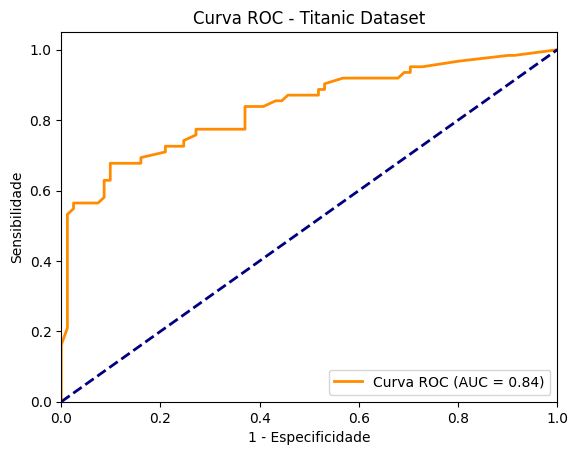

In [63]:
# Plotar a curva ROC e o valor de AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidade')
plt.ylabel('Sensibilidade')
plt.title('Curva ROC - Titanic Dataset')
plt.legend(loc='lower right')
plt.show()

In [79]:
# Separando variáveis preditoras e target do SHAP
X = data.drop('Survived', axis=1)
y = data['Survived']

In [80]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
# Treinando um modelo RandomForest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Criando o objeto explainer do SHAP
explainer = shap.KernelExplainer(clf.predict, X_train)

Using 571 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [83]:
# Calculando os valores SHAP
shap_values = explainer.shap_values(X_test)

100%|████████████████████████████████████████████████████████████████████████████████| 143/143 [00:13<00:00, 10.66it/s]


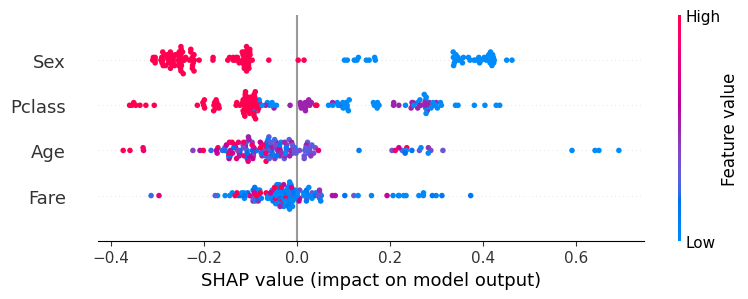

In [84]:
# Visualizando o summary plot dos valores SHAP
shap.summary_plot(shap_values, X_test, feature_names=X.columns)